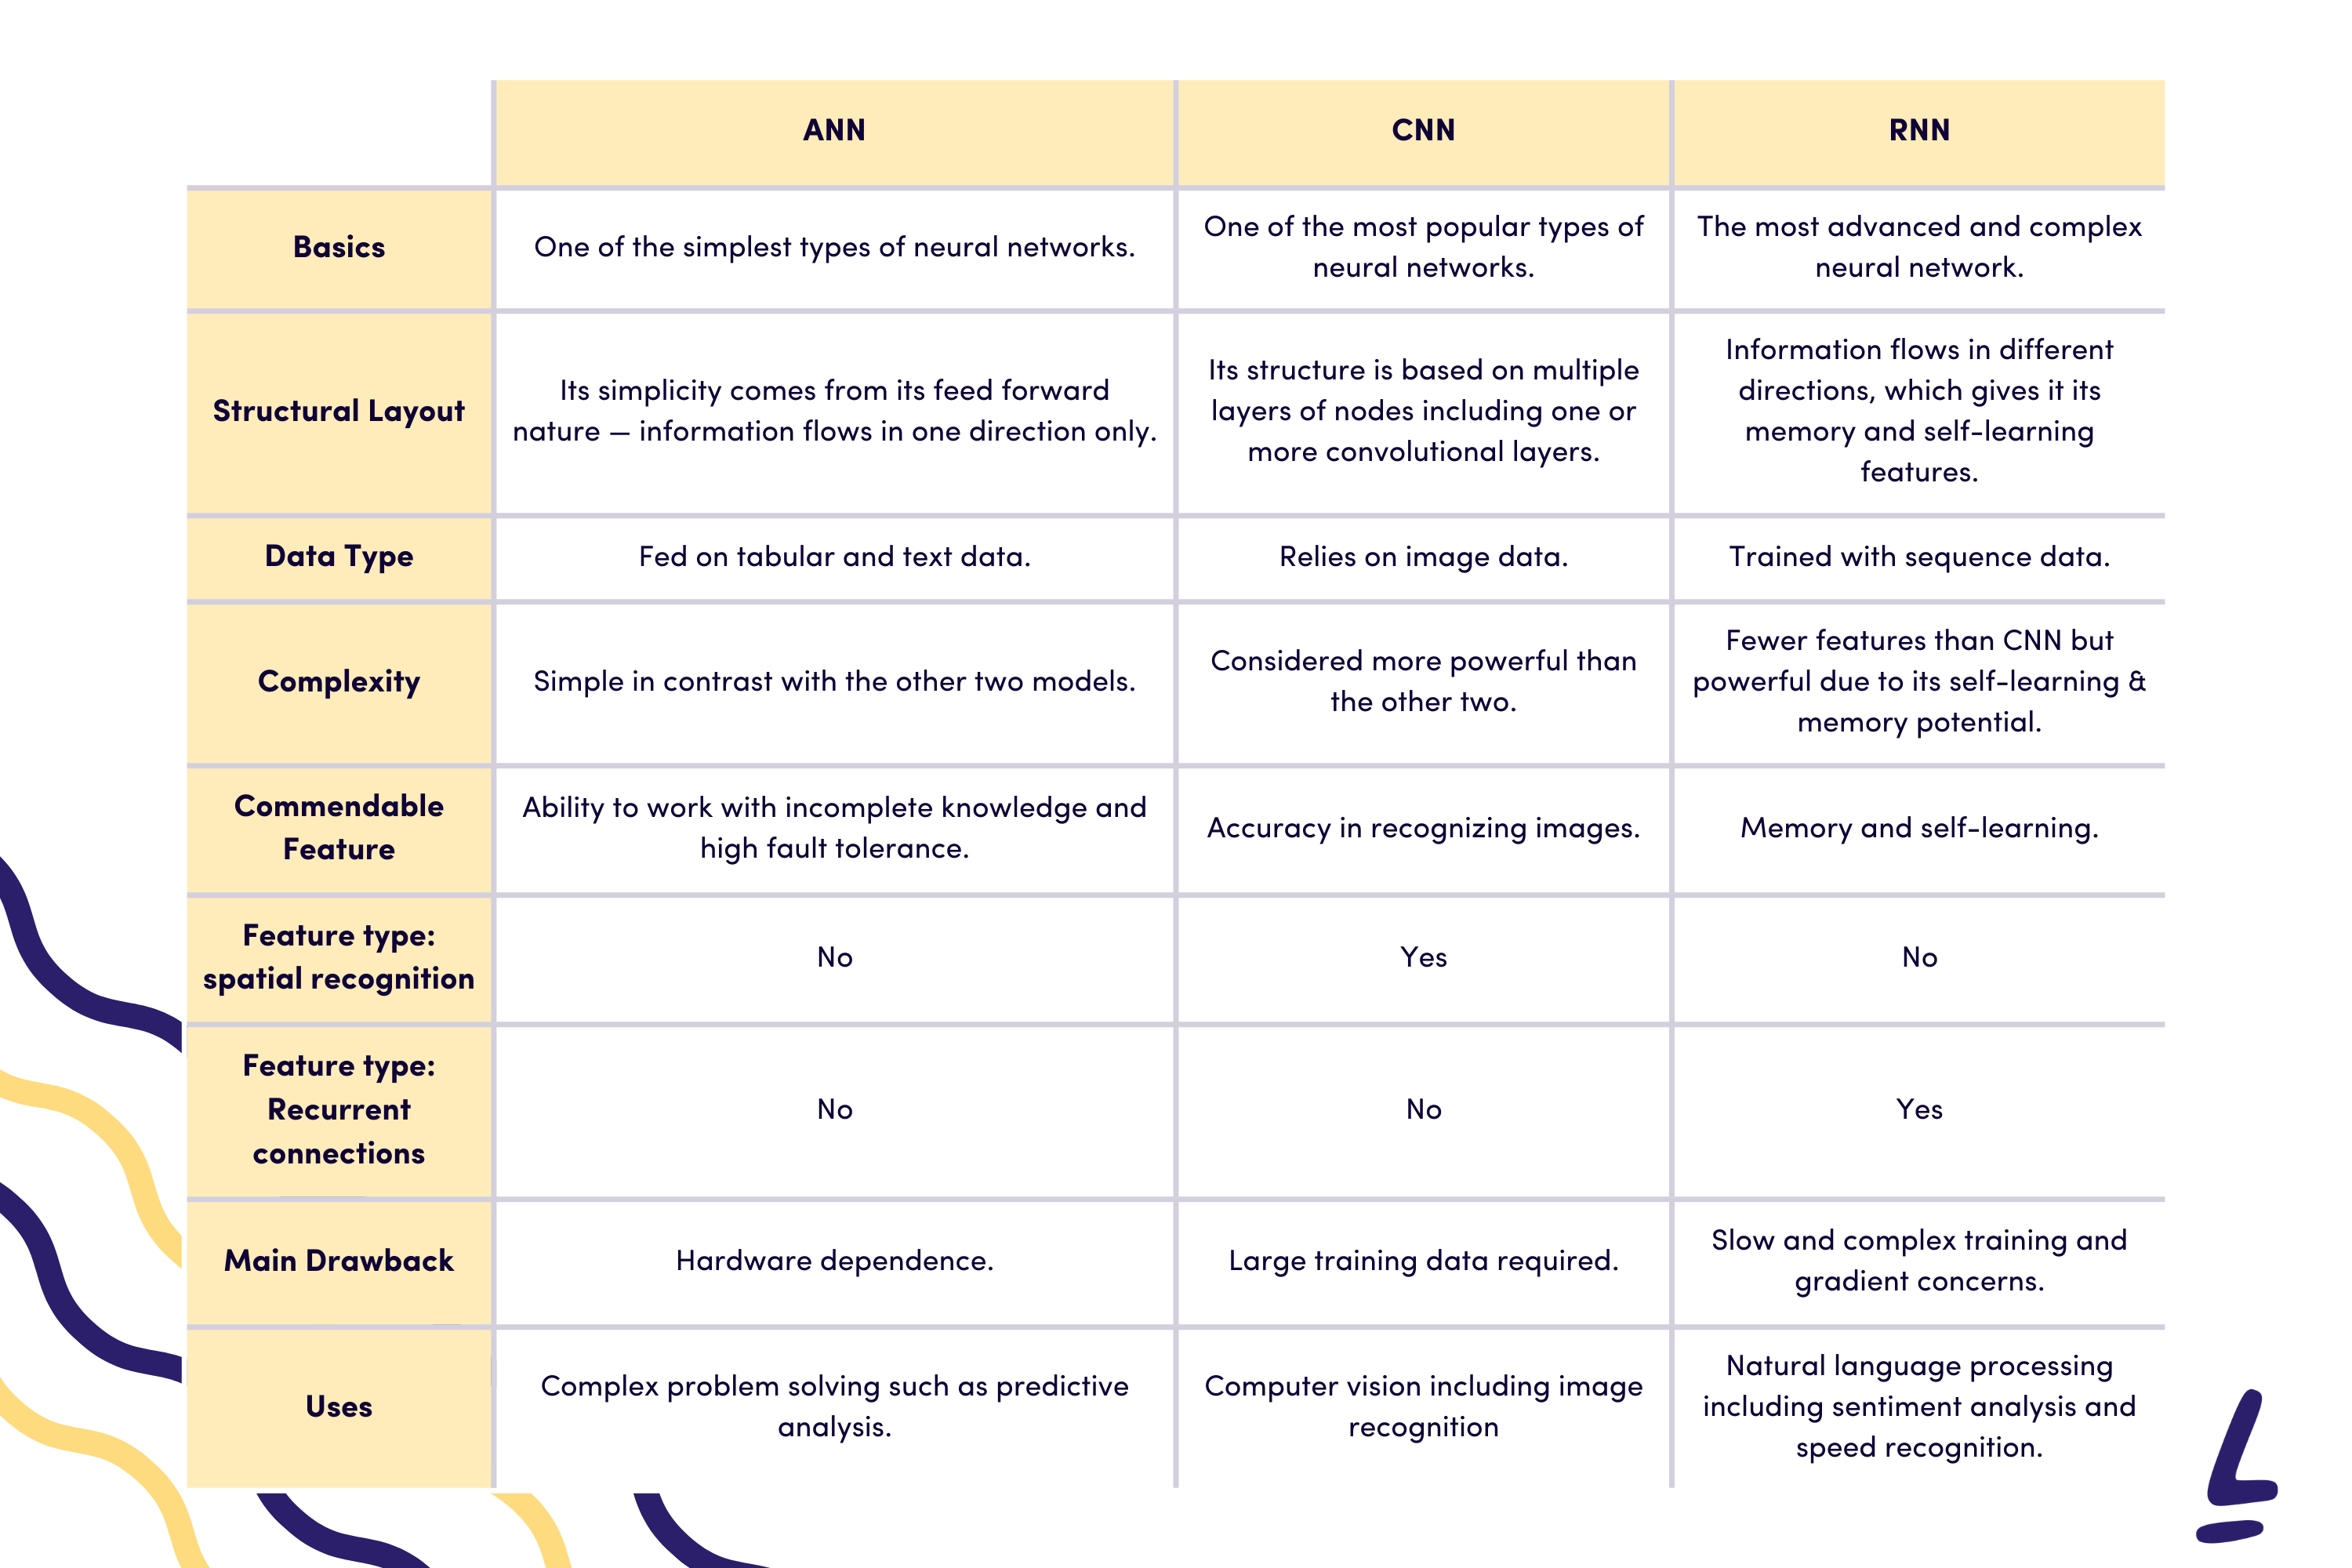

* Steps:

1. load dataset (csv)
2. eng -> sentances -> embedding
3. build RNN
4. train
5. prediction

In [1]:
import pandas as pd

df = pd.read_csv('/Users/sanghvi/Desktop/Coding/Pytorch/100_Unique_QA_Dataset.csv')

df.head()

,question,answer
0,What is the capital of France?,Paris
1,What is the capital of Germany?,Berlin
2,Who wrote 'To Kill a Mockingbird'?,Harper-Lee
3,What is the largest planet in our solar system?,Jupiter
4,What is the boiling point of water in Celsius?,100


In [4]:
# Tokenize
def tokenize(text):
    text = text.lower()
    text.replace('?', '')
    text.replace("'", '')
    return text.split()

In [5]:
tokenize('What is the capital of France?')

['what', 'is', 'the', 'capital', 'of', 'france?']

In [6]:
# Vocab
vocab = {'<UNK>':0}

In [7]:
def build_vocab(row):
    tokenized_question = tokenize(row['question'])
    tokenized_answer = tokenize(row['answer'])
    merged_tokens = tokenized_question + tokenized_answer
    print(merged_tokens)

    for token in merged_tokens:
        if token not in vocab:
            vocab[token] = len(vocab)

In [43]:
df.apply(build_vocab, axis=1)

['what', 'is', 'the', 'capital', 'of', 'france?', 'paris']
['what', 'is', 'the', 'capital', 'of', 'germany?', 'berlin']
['who', 'wrote', "'to", 'kill', 'a', "mockingbird'?", 'harper-lee']
['what', 'is', 'the', 'largest', 'planet', 'in', 'our', 'solar', 'system?', 'jupiter']
['what', 'is', 'the', 'boiling', 'point', 'of', 'water', 'in', 'celsius?', '100']
['who', 'painted', 'the', 'mona', 'lisa?', 'leonardo-da-vinci']
['what', 'is', 'the', 'square', 'root', 'of', '64?', '8']
['what', 'is', 'the', 'chemical', 'symbol', 'for', 'gold?', 'au']
['which', 'year', 'did', 'world', 'war', 'ii', 'end?', '1945']
['what', 'is', 'the', 'longest', 'river', 'in', 'the', 'world?', 'nile']
['what', 'is', 'the', 'capital', 'of', 'japan?', 'tokyo']
['who', 'developed', 'the', 'theory', 'of', 'relativity?', 'albert-einstein']
['what', 'is', 'the', 'freezing', 'point', 'of', 'water', 'in', 'fahrenheit?', '32']
['which', 'planet', 'is', 'known', 'as', 'the', 'red', 'planet?', 'mars']
['who', 'is', 'the', 'au

0     None
1     None
2     None
3     None
4     None
      ... 
85    None
86    None
87    None
88    None
89    None
Length: 90, dtype: object

In [44]:
len(vocab)

337

In [45]:
# convert words to numerical indices
def text_to_indices(text, vocab):

  indexed_text = []

  for token in tokenize(text):

    if token in vocab:
      indexed_text.append(vocab[token])
    else:
      indexed_text.append(vocab['<UNK>'])

  return indexed_text

In [49]:
text_to_indices("who is aadish", vocab)

[10, 2, 0]

In [52]:
import torch
from torch.utils.data import Dataset, DataLoader

In [60]:
class QADataset(Dataset):
    def __init__(self, df, vocab):
        self.df = df
        self.vocab = vocab
    
    def __len__(self):
        return self.df.shape[0]
    
    def __getitem__(self, index):
        numerical_question = text_to_indices(self.df.iloc[index]['question'], self.vocab)
        numerical_answer = text_to_indices(self.df.iloc[index]['answer'], self.vocab)

        return torch.tensor(numerical_question), torch.tensor(numerical_answer)

In [61]:
dataset = QADataset(df, vocab)

In [62]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [63]:
for question, answer in dataloader:
  print(question, answer[0])

tensor([[10, 56,  3, 57,  5, 58]]) tensor([59])
tensor([[ 42,  18, 121,   3, 193, 194]]) tensor([195])
tensor([[ 1,  2,  3, 17, 18, 19, 20, 21, 22]]) tensor([23])
tensor([[  1,   2,   3, 187, 188, 189, 190]]) tensor([191])
tensor([[  1,   2,   3,  37,  38,  39, 168]]) tensor([169])
tensor([[ 10,  29, 134, 135]]) tensor([136])
tensor([[1, 2, 3, 4, 5, 8]]) tensor([9])
tensor([[10, 77, 78]]) tensor([79])
tensor([[ 42, 142,   2, 143,  39, 182, 280]]) tensor([281])
tensor([[ 42, 266,   2, 267,  85, 268, 269]]) tensor([270])
tensor([[ 10, 146,   3, 147, 282,  95, 283,   5,   3, 284]]) tensor([285])
tensor([[ 80,  81, 133,  83,  19,   3,  21,  22]]) tensor([36])
tensor([[ 10,  98,   3, 107, 250]]) tensor([251])
tensor([[  1,   2,   3, 153, 154,  19, 155]]) tensor([156])
tensor([[ 42, 261, 262, 121, 263, 264]]) tensor([265])
tensor([[  1,  89, 239, 240, 241, 242]]) tensor([243])
tensor([[ 10,  77, 114]]) tensor([115])
tensor([[  1,   2,   3, 106,   5, 107,  19, 108]]) tensor([109])
tensor([[ 4

In [65]:
import torch.nn as nn

In [ ]:
class SimpleRNN(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    # Converts integer tokens into vectors of size 50. each word is mapped to a 50-dimensional vector.
    self.embedding = nn.Embedding(vocab_size, embedding_dim=50)
    self.rnn = nn.RNN(50, 64, batch_first=True)
    self.fc = nn.Linear(64, vocab_size)

  def forward(self, question):
    embedded_question = self.embedding(question)
    hidden, final = self.rnn(embedded_question)
    output = self.fc(final.squeeze(0))

    return output

In [67]:
x = nn.Embedding(324, embedding_dim=50)
y = nn.RNN(50, 64, batch_first=True)
z = nn.Linear(64, 324)

a = dataset[0][0].reshape(1,6)
print("shape of a:", a.shape)
b = x(a)
print("shape of b:", b.shape)
c, d = y(b)
print("shape of c:", c.shape)
print("shape of d:", d.shape)

e = z(d.squeeze(0))

print("shape of e:", e.shape)

shape of a: torch.Size([1, 6])
shape of b: torch.Size([1, 6, 50])
shape of c: torch.Size([1, 6, 64])
shape of d: torch.Size([1, 1, 64])
shape of e: torch.Size([1, 324])


In [68]:
learning_rate = 0.001
epochs = 20

In [69]:
model = SimpleRNN(len(vocab))

In [70]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [71]:
# training loop

for epoch in range(epochs):

  total_loss = 0

  for question, answer in dataloader:

    optimizer.zero_grad()

    # forward pass
    output = model(question)

    # loss -> output shape (1,324) - (1)
    loss = criterion(output, answer[0])

    # gradients
    loss.backward()

    # update
    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch+1}, Loss: {total_loss:4f}")

Epoch: 1, Loss: 527.553561
Epoch: 2, Loss: 451.795950
Epoch: 3, Loss: 372.242417
Epoch: 4, Loss: 316.208333
Epoch: 5, Loss: 267.300887
Epoch: 6, Loss: 219.779703
Epoch: 7, Loss: 176.644562
Epoch: 8, Loss: 138.944187
Epoch: 9, Loss: 107.639244
Epoch: 10, Loss: 82.942658
Epoch: 11, Loss: 64.840278
Epoch: 12, Loss: 49.947219
Epoch: 13, Loss: 39.907634
Epoch: 14, Loss: 32.189281
Epoch: 15, Loss: 26.216994
Epoch: 16, Loss: 21.766147
Epoch: 17, Loss: 18.345375
Epoch: 18, Loss: 15.504281
Epoch: 19, Loss: 13.381836
Epoch: 20, Loss: 11.512582


In [72]:
def predict(model, question, threshold=0.5):

  # convert question to numbers
  numerical_question = text_to_indices(question, vocab)

  # tensor
  question_tensor = torch.tensor(numerical_question).unsqueeze(0)

  # send to model
  output = model(question_tensor)

  # convert logits to probs
  probs = torch.nn.functional.softmax(output, dim=1)

  # find index of max prob
  value, index = torch.max(probs, dim=1)

  if value < threshold:
    print("I don't know")

  print(list(vocab.keys())[index])

In [73]:
predict(model, "What is the largest planet in our solar system?")

jupiter


In [74]:
list(vocab.keys())[7]

'paris'